In [47]:
import cv2
import numpy as np

In [48]:
filename = 'toy1.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
cv2.imshow('dst',img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

In [6]:
def nothing(x):
    pass

In [7]:
cv2.namedWindow('image')
cv2.createTrackbar('threshold', 'image', 10 , 1000, nothing)
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    threshold = cv2.getTrackbarPos('threshold', 'image') 
    if(threshold <= 1):
        threshold=1
    img = cv2.imread(filename)
    img[dst>1./threshold*dst.max()]=[0,0,255]
    cv2.imshow('image', img)
cv2.destroyAllWindows()   

In [8]:
filename = 'horse.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)
# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]
cv2.imwrite('subpixel5.png',img)
for i in range(res.shape[0]):
    cv2.circle(img,(res[i,0],res[i,1]),2,(0,0,255),-1)
    cv2.circle(img,(res[i,2],res[i,3]),3,(0,255,0),-1)
cv2.imshow('dst',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

1.5.3 Shi-Tomasi Corner Detector & Good Features to Track

In [95]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [96]:
img = cv2.imread('horse.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)

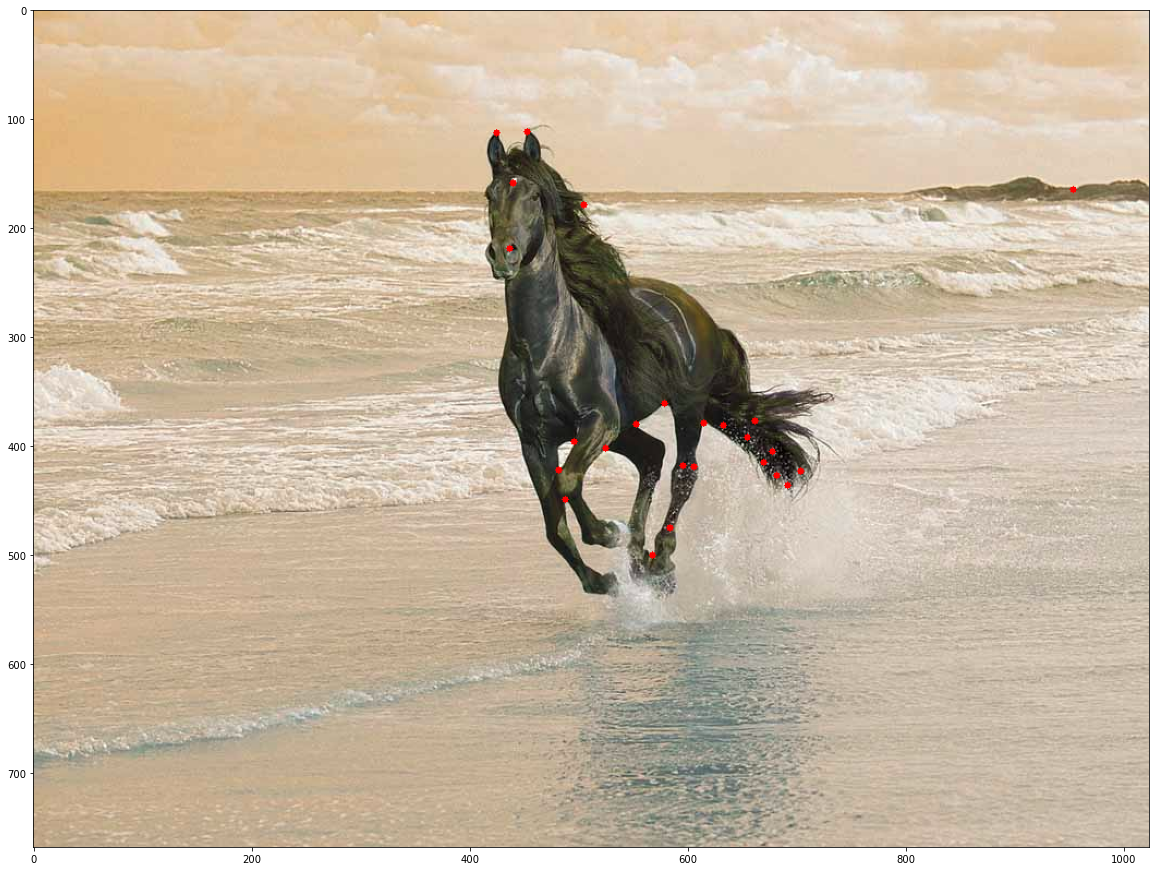

(<matplotlib.image.AxesImage at 0x23b06187910>, None)

In [97]:
plt.figure(figsize=(20,20))
plt.imshow(img),plt.show()

1.5.4 Introduction to SIFT (Scale-Invariant Feature Transform)

In [90]:
import cv2
import numpy as np

In [91]:
img = cv2.imread('sim0.png')

In [92]:
img = cv2.imread('horse.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [93]:
sift = cv2.SIFT_create()
kp = sift.detect(gray,None)
img=cv2.drawKeypoints(img,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

In [94]:
cv2.imshow('dst',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

1.5.9

In [70]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [71]:
img1 = cv2.imread('toy0.png',0) # queryImage
img2 = cv2.imread('toy1.png',0) # trainImage

In [72]:
# Initiate SIFT detector
sift = cv2.SIFT_create()
kp1,des1 = sift.detectAndCompute(img1,None)
kp2,des2 = sift.detectAndCompute(img2,None)

In [79]:
img1v = cv2.drawKeypoints(img1,kp1,img1,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2v = cv2.drawKeypoints(img1,kp1,img1,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

In [84]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
good=[]

In [86]:
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

In [87]:
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

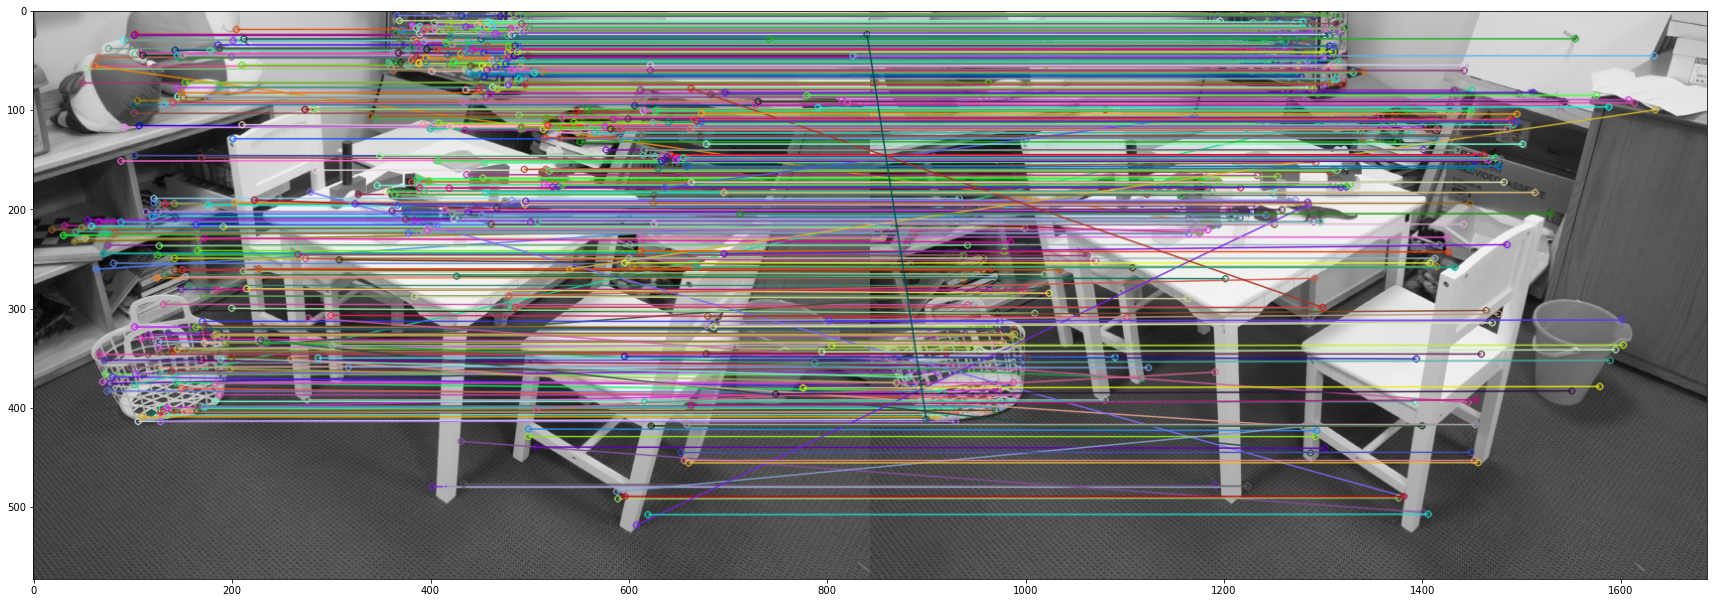

(<matplotlib.image.AxesImage at 0x23b05fd4400>, None)

In [89]:
plt.figure(figsize=(30,15))
plt.imshow(img3),plt.show()